# Subject: Data Science Foundation

## Session 13 - Correlation in Python.

### Assignment 1 -  Calculating Correlation for pandas Dataframe "Titanic"


- Considering the Correlation analysis presented in Demo 1 develop a new one for the data set “Titanic”. 
- Select the variables most appropriate and justify your option.
- Commit scripts in your GitHub account. You should export your your solution code (.ipynb notebook) and push it to your repository “DataScienceFoundations”.
- The following are the tasks that should complete and synchronize with your repository “DataScienceFoundations” until November 23. Please notice that this task will not be graded, however it’s important that you correctly understand and complete them in order to be sure that you won’t have problems with further assignments.

Guidelines:
- Clone the Git repository to get an initial code: 
https://github.com/FGutierresBTS/BTS_MasterInBigData.git
- Once you downloaded the repository to your local file system, go to the folder “BTS_MasterInBigData/ Session_13_DSF”. 
- Copy the folder “Session_13_DSF” into your local folder “DataScienceFoundations”. 
- In the folder “Session_13_DSF” you will see the files called: 
    -	BTS_DataScienceFoundations_Session13_Correlation_Individual_assignment.ipynb.
    -   "1_titanic_dataset.csv" (note: this dataset must be pre-processed).
- Import these files into Jupyter Notebook using the “Upload” button. 
- Open the imported script and put your code inside the notebook. 
- Export your Assignment *.ipynb notebook and push it to your repository “DataScienceFoundations”.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
df=pd.read_csv("C:/Users/francisco.sacramento/Desktop/Master_Big_Data_Phyton/6_Exercices/Data Science Foundations/Session_13_DSF/1_titanic_dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


> Put your code here

> Answer question here

In [3]:
df.shape           # Check dimensions

(891, 12)

In [4]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [7]:
categorical = df.dtypes[df.dtypes == "object"].index
print(categorical)

df[categorical].describe()

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Lefebre, Miss. Mathilde",male,347082,G6,S
freq,1,577,7,4,644


In [8]:
new_age_var = np.where(df["Age"].isnull(), # Logical check
                       28,                       # Value if check is true
                       df["Age"])     # Value if check is false

df["Age"] = new_age_var 

df["Age"].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [9]:
del df["PassengerId"]     # Remove PassengerId

In [10]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
df.corr(method='spearman')

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.339668,-0.037004,0.088879,0.138266,0.323736
Pclass,-0.339668,1.000000,-0.317406,-0.043019,-0.022801,-0.688032
Age,-0.037004,-0.317406,1.000000,-0.145316,-0.217488,0.126006
SibSp,0.088879,-0.043019,-0.145316,1.000000,0.450014,0.447113
Parch,0.138266,-0.022801,-0.217488,0.450014,1.000000,0.410074
Fare,0.323736,-0.688032,0.126006,0.447113,0.410074,1.000000


In [16]:
df.corr(method='pearson')

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500
Age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688
SibSp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000


In [12]:
df.corr(method='spearman').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

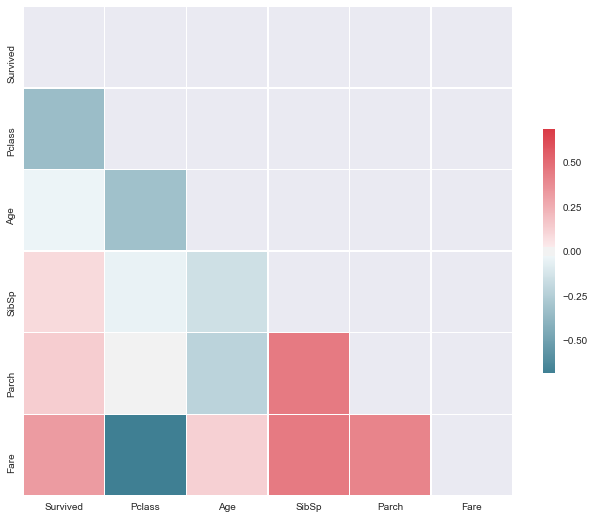

In [11]:
# Compute the correlation matrix

corr = df.corr(method='spearman')

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Conclusion: 

- Weak and negative correlation (-0.34) between Pclass and Survived.

- No correlation (close to 0) between Survived and Age (-0.037), SibSp (0.089) and Parch (0.14).

- Weak and positive correlation (0.32) between Survived and Fare.

- Strong and negative correlation (-0.69) between Fare and Pclass.

# Note:

- HOW TO INTERPRET A CORRELATION COEFFICIENT R?
    
The value of r is always between +1 and –1. To interpret its value, see which of the following values your correlation r is closest to:
        
Exactly –1. A perfect downhill (negative) linear relationship

–0.70. A strong downhill (negative) linear relationship

–0.50. A moderate downhill (negative) relationship

–0.30. A weak downhill (negative) linear relationship

0 No linear relationship

+0.30. A weak uphill (positive) linear relationship

+0.50. A moderate uphill (positive) relationship

+0.70. A strong uphill (positive) linear relationship

Exactly +1. A perfect uphill (positive) linear relationship